In [2]:
from pandas import Series, Timestamp, DataFrame
import pandas as pd
import numpy as np
import simplejson as json
import matplotlib.pyplot as plt
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [4]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [5]:
# Load data for town called Ambridge
data_path = '../data/ambridge/'


# Seperate the files 
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file).set_index("business_id")
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [6]:
display(reviews)
display(businesses)

print(businesses.loc["dJ0R-XT78LUQeNHQkD-G9g"]["name"])

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02
1,Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39
2,Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13
3,tuDIfqFjtj5zTLjtY9W1Hg,dUOg3fS3RTYDZUpu0CqqiA,729grSa1Wsn-hfv7D5uOxg,5.0,2,0,1,Police Station Pizza has always been my favori...,2014-10-28 18:29:48
4,zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06
...,...,...,...,...,...,...,...,...,...
374,_mw0xf5enQSEUMUAoIiLZg,voyChD-aoglG2mWMySA6Ow,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I have to recommend spending the afternoon at ...,2015-11-07 22:25:16
375,iKcapQ8yQ1PyVj2aZ7qEuQ,QPPgrlRtln6lbf9TRkzxLA,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,We held our wedding in the garden at Old Econo...,2017-08-23 23:19:12
376,1rYRDNCQMue4ptTfVw1NRA,8lCl40obN7k8v-wc4dAaiA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,0,0,0,For years and years there was no place in Ambr...,2018-03-11 17:17:48
377,G6HnqzjaG3Jcb_NlfyNcbg,mLoENT0k1il695DIcPCdGA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,2,0,2,Good service. Low Prices. Food was really good...,2018-05-14 12:50:38


,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
business_id,,,,,,,,,,,,,
dJ0R-XT78LUQeNHQkD-G9g,Ice Cream Therapy,400 Merchant St,Ambridge,PA,15003,40.584100,-80.225135,3.5,3,1,None,"Food, Ice Cream & Frozen Yogurt","{'Monday': '15:0-22:0', 'Tuesday': '15:0-22:0'..."
3gL18eXylqutlzqb6TmB0w,Action Tire Company,304 Duss Ave,Ambridge,PA,15003,40.582380,-80.223875,5.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Smog Check Stations, Tires, Autom...","{'Monday': '6:30-16:0', 'Tuesday': '6:30-16:0'..."
Q_0eGl-aElqHKukHvmLdwA,Nelia's Smokehouse,603 Duss Ave,Ambridge,PA,15003,40.587939,-80.224885,4.0,18,0,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'Fals...","Filipino, Food, Restaurants, Barbeque, Smokehouse","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."
Eu_zPTrNVAXkpdSxf7CJ2w,K & N Restaurant,755 Merchant St,Ambridge,PA,15003,40.588606,-80.229103,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."
Yjf0i2J9q52dYIT8UVGT3g,Heritage Floral Shoppe,663 Merchant St,Ambridge,PA,15003,40.587650,-80.228493,4.5,4,1,"{'BusinessParking': '{'garage': False, 'street...","Florists, Flowers & Gifts, Shopping","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ..."
y3IVqEFHmrkgVKj2x1Ci4w,Off the Hook Exotics,598 Merchant St,Ambridge,PA,15003,40.586533,-80.226988,4.0,5,1,None,"Pets, Pet Stores",None
729grSa1Wsn-hfv7D5uOxg,Pizza House,1007 Merchant St,Ambridge,PA,15003,40.592077,-80.230377,4.5,32,1,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Pizza","{'Monday': '17:0-23:0', 'Tuesday': '17:0-23:0'..."
rdHO0LkiNe6s3716hPuQXQ,Firehouse Lounge,1301 Merchant St,Ambridge,PA,15003,40.595781,-80.230735,4.0,5,1,"{'HappyHour': 'True', 'GoodForDancing': 'False...","Lounges, Nightlife, Restaurants, Bars","{'Monday': '9:0-2:0', 'Tuesday': '9:0-2:0', 'W..."
iJhb_2JL1uIbIRYUl41uVg,Pucktastic Auto Detailing,207 12th St,Ambridge,PA,15003,40.594775,-80.231370,5.0,3,1,{'BusinessAcceptsCreditCards': 'True'},"Car Wash, Automotive, Auto Detailing","{'Monday': '0:0-0:0', 'Saturday': '8:0-20:0', ..."


Ice Cream Therapy


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,total text,total reviews,total words
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02,79,0,79
1,Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39,40,1,40
2,Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13,44,2,44
3,tuDIfqFjtj5zTLjtY9W1Hg,dUOg3fS3RTYDZUpu0CqqiA,729grSa1Wsn-hfv7D5uOxg,5.0,2,0,1,Police Station Pizza has always been my favori...,2014-10-28 18:29:48,181,3,181
4,zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06,46,4,46
...,...,...,...,...,...,...,...,...,...,...,...,...
374,_mw0xf5enQSEUMUAoIiLZg,voyChD-aoglG2mWMySA6Ow,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I have to recommend spending the afternoon at ...,2015-11-07 22:25:16,40,374,40
375,iKcapQ8yQ1PyVj2aZ7qEuQ,QPPgrlRtln6lbf9TRkzxLA,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,We held our wedding in the garden at Old Econo...,2017-08-23 23:19:12,55,375,55
376,1rYRDNCQMue4ptTfVw1NRA,8lCl40obN7k8v-wc4dAaiA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,0,0,0,For years and years there was no place in Ambr...,2018-03-11 17:17:48,63,376,63
377,G6HnqzjaG3Jcb_NlfyNcbg,mLoENT0k1il695DIcPCdGA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,2,0,2,Good service. Low Prices. Food was really good...,2018-05-14 12:50:38,33,377,33


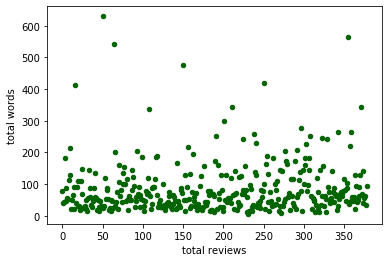

In [21]:
reviews['total reviews'] = pd.Series(list(range(len(reviews))))
reviews['total words'] = reviews['text'].str.split().str.len()
display(reviews)

graph = reviews.plot.scatter(x='total reviews', y='total words', color='Darkgreen')

# The functions below were taken and modified from bit.ly/2T8vnLe

In [84]:
tfidf = TfidfVectorizer(stop_words = "english")

#Only use reviews which consists of more than 50 characters
reviews = reviews[reviews["text"].apply(lambda x: len(x) > 50)]

reviews["text"] = reviews["text"].fillna("")

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(reviews["text"])

In [85]:
similarity_matrix = linear_kernel(overview_matrix,overview_matrix)

display(similarity_matrix)

array([[1.        , 0.01296362, 0.01067563, ..., 0.04348484, 0.05866513,
        0.        ],
       [0.01296362, 1.        , 0.08028679, ..., 0.        , 0.        ,
        0.        ],
       [0.01067563, 0.08028679, 1.        , ..., 0.02902646, 0.0212333 ,
        0.01749609],
       ...,
       [0.04348484, 0.        , 0.02902646, ..., 1.        , 0.28169489,
        0.04384314],
       [0.05866513, 0.        , 0.0212333 , ..., 0.28169489, 1.        ,
        0.        ],
       [0.        , 0.        , 0.01749609, ..., 0.04384314, 0.        ,
        1.        ]])

In [86]:
mapping = pd.Series(reviews.index, index = reviews["text"])

In [87]:
categories_dict = {}

for category in businesses["categories"].values:
    all_categories = category.split(",")
    for word in all_categories:
        categories_dict[word] = 0

In [88]:
def category_splitter(categories):
    return categories.split(",")

category_splitter("Filipino, Food, Restaurants, Barbeque, Smokehouse")

['Filipino', ' Food', ' Restaurants', ' Barbeque', ' Smokehouse']

In [95]:
"""
Functions returns a list of business ids based on similair reviews.
"""

def recommended_business(review, similarity_threshold, similair_categories_threshold):
    review_index = mapping[review]
    
    #get similarity values with other businesses
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[review]))

    #sort in descending order the similarity score of business put in with all the other businesses
    similarity_score = sorted(similarity_score, key = lambda x: x[1], reverse=True)
            
    # Get the scores of the similar businesses where the similarity score is above the threshold
    recommendations = []
    for score in range(len(similarity_score)):
        if similarity_score[score][1] > similarity_threshold:
            recommendations.append(similarity_score[score])

    #find ids of similair reviews
    review_indices = [i[0] for i in recommendations]
    similair_reviews = reviews["text"].iloc[review_indices].index
    
    similair_businesses, used_businesses = [], []
    
    for review_id in similair_reviews:
        business_id = reviews.iloc[review_id]["business_id"]
        if business_id not in used_businesses:
            used_businesses.append(business_id)
            
            for test in category_splitter(businesses.loc[business_id]["categories"]):
                categories_dict[test] = categories_dict[test] + 1
                
                
            if any(value > similair_categories_threshold for value in categories_dict.values()):
                categories_dict.update((category, 0) for category in categories_dict)
            else:
                similair_businesses.append(businesses.loc[business_id]["name"])
                
    return Series(similair_businesses)

In [105]:
recommended_business(2, 0.05, 20)

0               Nelia's Smokehouse
1              Bridgetown Taphouse
2                 Breakfast Shoppe
3               Tex-Mix Restaurant
4               Rivertown Antiques
5     Annie Lee's Southern Kitchen
6              Ambridge Do It Best
7                 Frank's Pizzeria
8                        Caffe 501
9                 K & N Restaurant
10          Little Athens Catering
11                Maple Restaurant
12                 Fox's Pizza Den
dtype: object